In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Question 1 ###

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import diamond data
diamonds_df = pd.read_csv('diamonds_ece219.csv')

# convert categorical data into numerial data
diamonds_df['cut_int'] = pd.Categorical(diamonds_df['cut']).codes
diamonds_df['color_int'] = pd.Categorical(diamonds_df['color']).codes
diamonds_df['clarity_int'] = pd.Categorical(diamonds_df['clarity']).codes
diamonds_df['symmetry_int'] = pd.Categorical(diamonds_df['symmetry']).codes
diamonds_df['polish_int'] = pd.Categorical(diamonds_df['polish']).codes
diamonds_df['girdle_min_int'] = pd.Categorical(diamonds_df['girdle_min']).codes
diamonds_df['girdle_max_int'] = pd.Categorical(diamonds_df['girdle_max']).codes

#### Question 1.1 ####

Text(0.5, 1.0, 'Pearson Correlation Matrix')

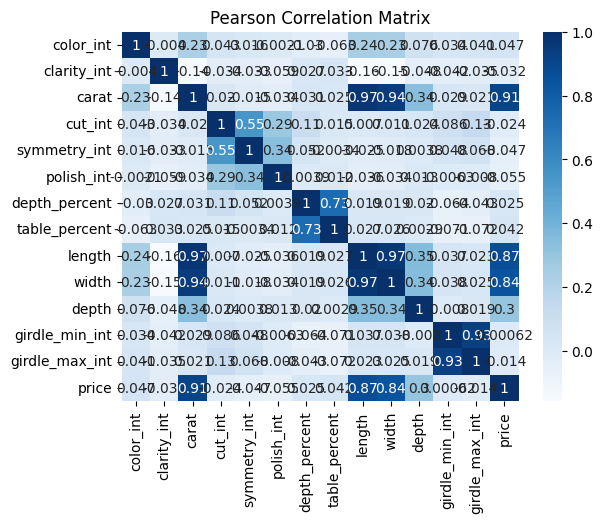

In [ ]:
sns.heatmap(diamonds_df[['color_int','clarity_int', 'carat','cut_int', 'symmetry_int', 'polish_int','depth_percent', 'table_percent','length','width','depth', 'girdle_min_int','girdle_max_int','price']].corr(), annot = True, cmap=plt.cm.Blues)
plt.title('Pearson Correlation Matrix')

The target variable in this analysis is the price. Observations from the matrix plot indicate that the attributes of diamond carat, length, width, and depth exhibit the strongest absolute correlation with price. This suggests that these specific dimensions are pivotal in determining the price of a diamond, highlighting their significant impact on valuation.

#### Question 1.2 ####

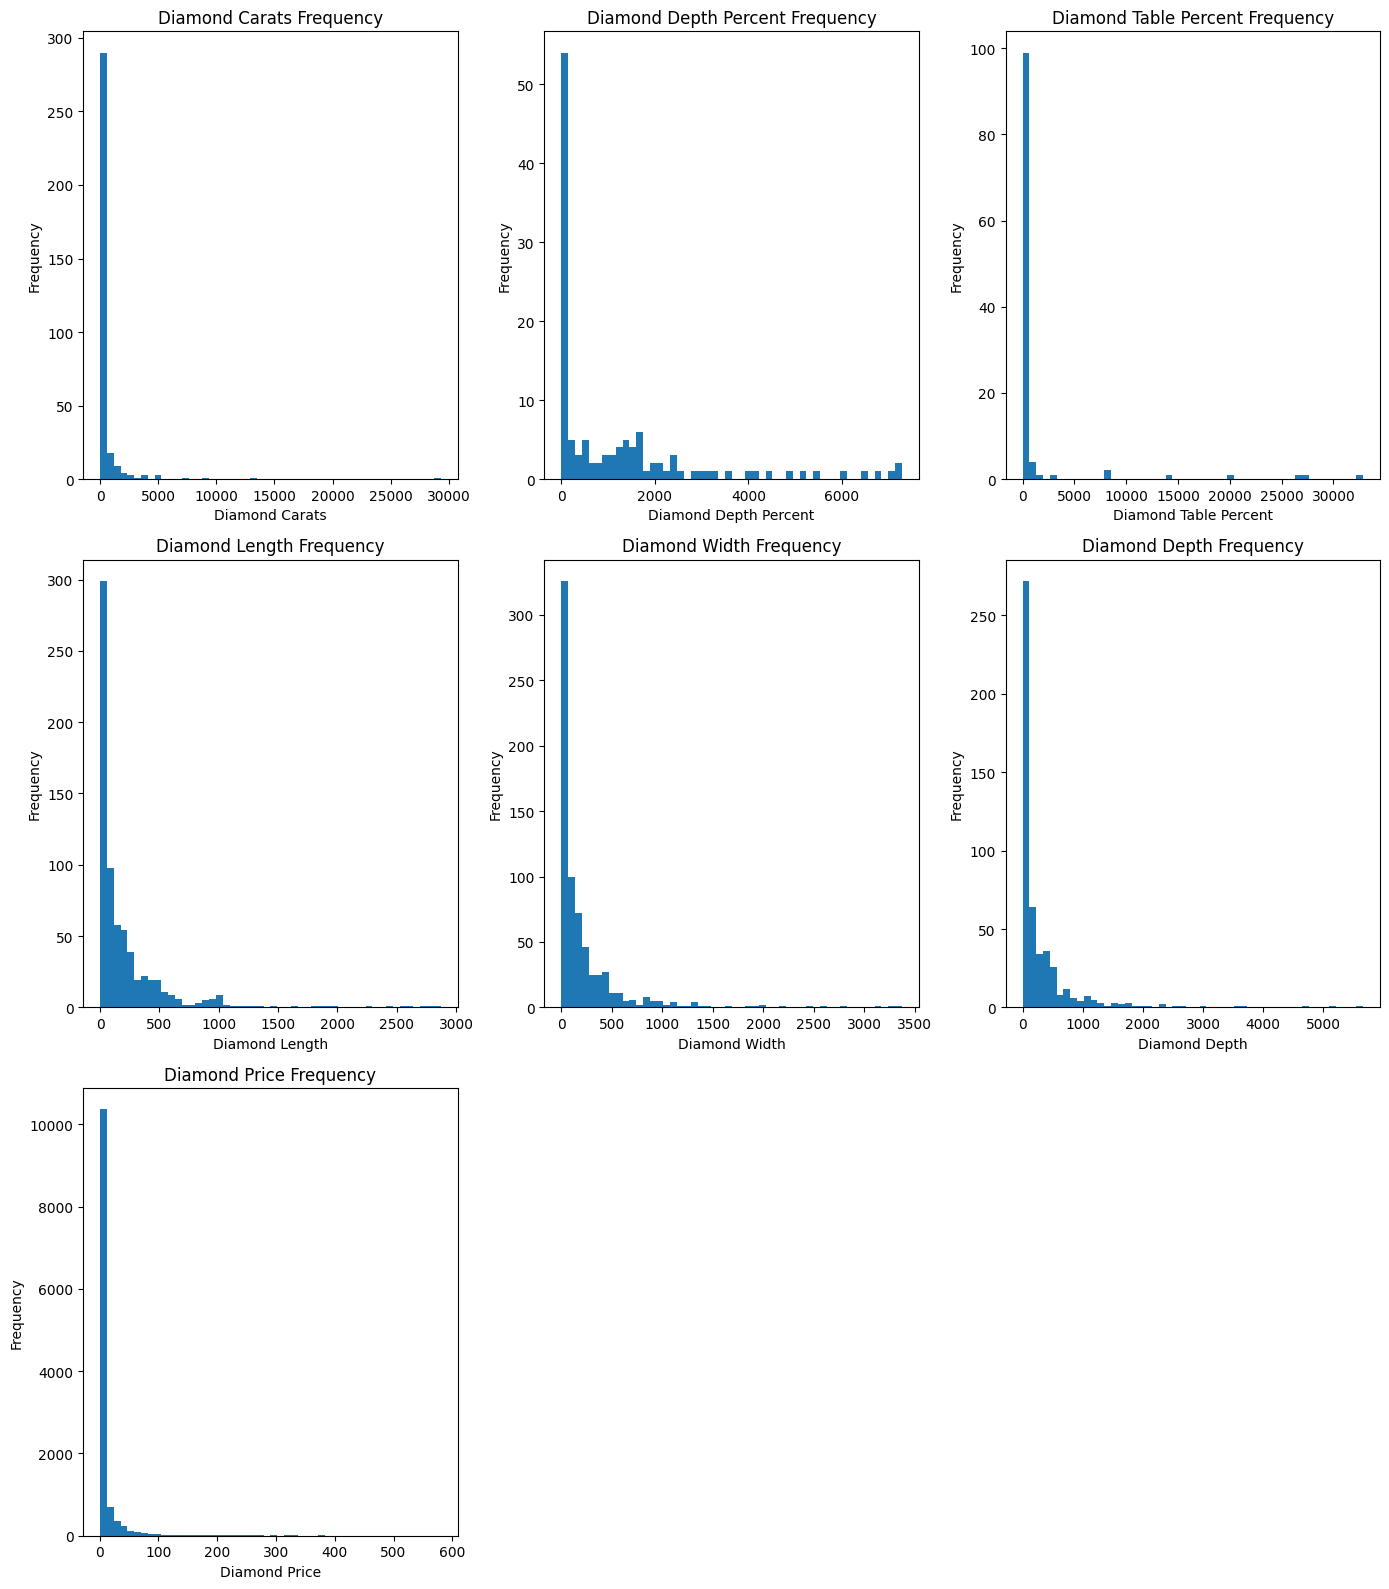

In [ ]:
import matplotlib.pyplot as plt

# Define attributes and their titles in a list of tuples
attributes_titles = [
    ('carat', 'Diamond Carats'),
    ('depth_percent', 'Diamond Depth Percent'),
    ('table_percent', 'Diamond Table Percent'),
    ('length', 'Diamond Length'),
    ('width', 'Diamond Width'),
    ('depth', 'Diamond Depth'),
    ('price', 'Diamond Price')
]

# Setup figure size
plt.figure(figsize=(14, 16))

# Loop through each attribute and plot in the subplot
for i, (attribute, title) in enumerate(attributes_titles, 1):
    plt.subplot(3, 3, i)
    diamonds_df[attribute].value_counts().plot.hist(bins=50)
    plt.xlabel(title)
    plt.title(f'{title} Frequency')

# Ensure the layout is organized to prevent overlap
plt.tight_layout()
plt.show()

#### Question 1.3 ####

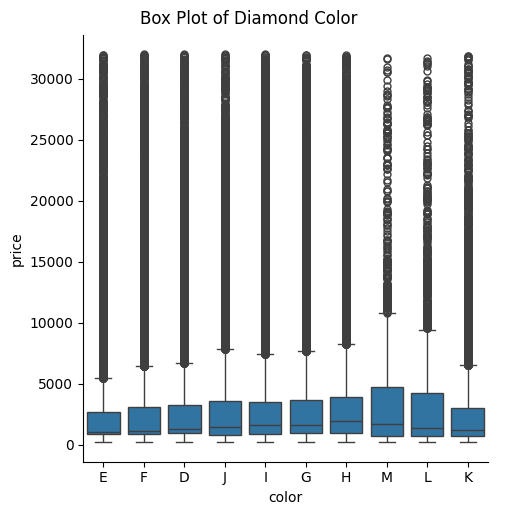

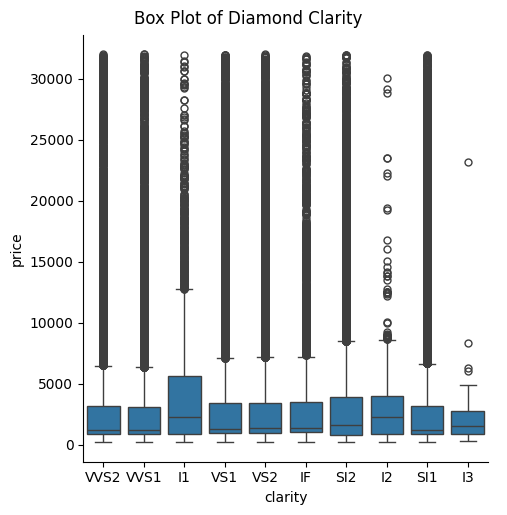

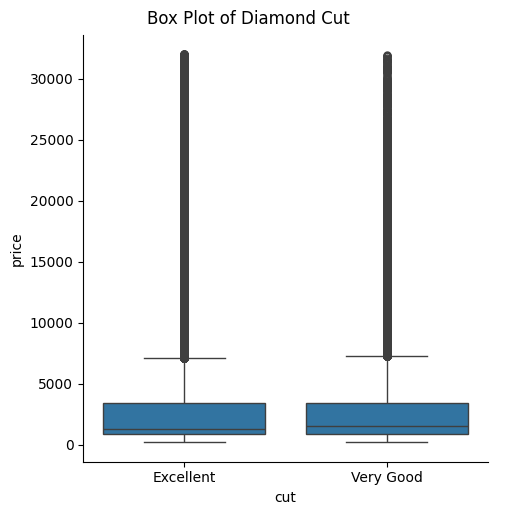

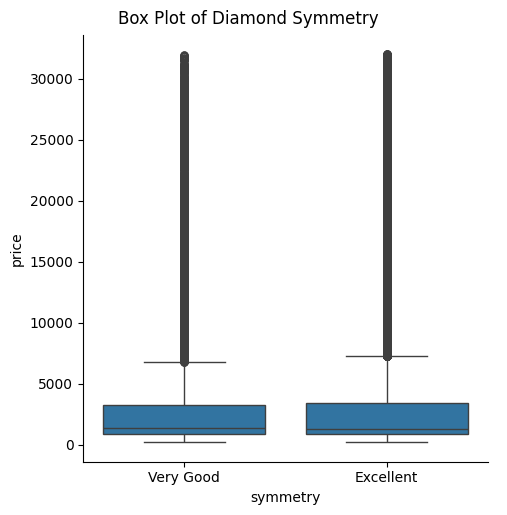

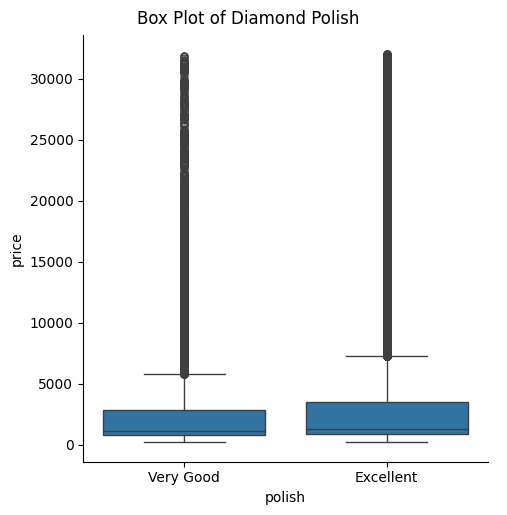

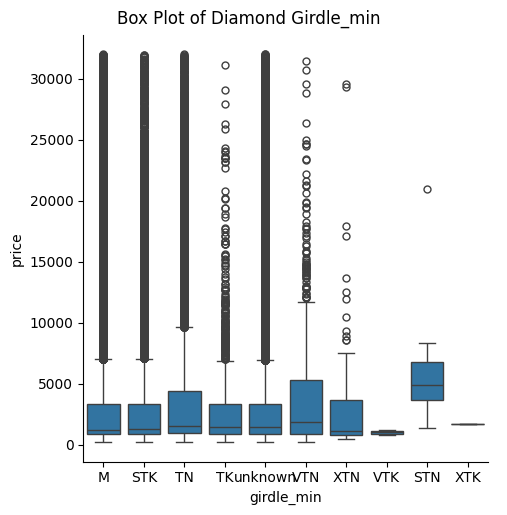

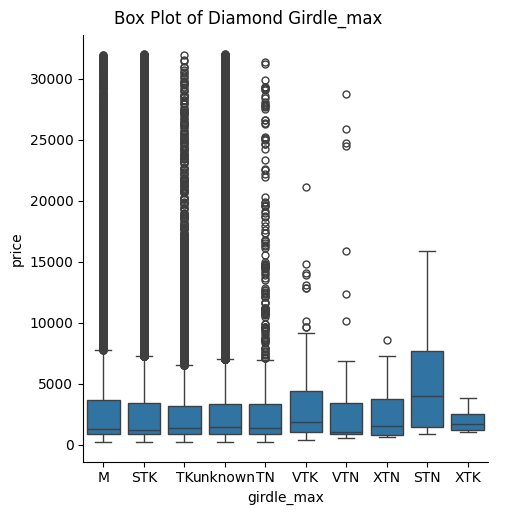

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of attributes to plot
attributes = ['color', 'clarity', 'cut', 'symmetry', 'polish', 'girdle_min', 'girdle_max']

# Loop through each attribute and create a box plot
for attribute in attributes:
    g = sns.catplot(data=diamonds_df, x=attribute, y="price", kind="box")
    g.fig.suptitle(f'Box Plot of Diamond {attribute.capitalize()}', y=1.02) # Adjust title and its position
    plt.show()

The analysis suggests that the cut quality of diamonds does not significantly influence their pricing, as observed prices across different cut grades appear to be relatively uniform. This indicates that factors other than cut quality may play a more pivotal role in determining diamond prices.

####Question 1.4####

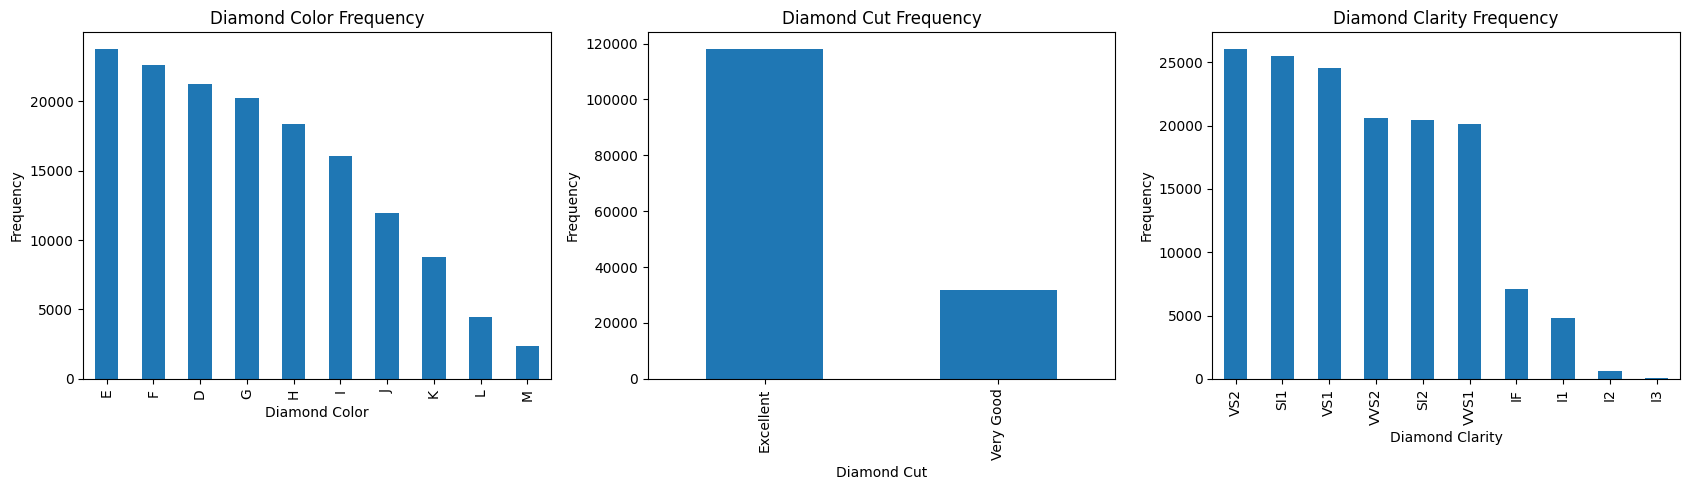

In [ ]:
# Setting up the figure for plotting
plt.figure(figsize=(17, 5))

# Attributes to plot
attributes = ['color', 'cut', 'clarity']
titles = ['Diamond Color Frequency', 'Diamond Cut Frequency', 'Diamond Clarity Frequency']
x_labels = ['Diamond Color', 'Diamond Cut', 'Diamond Clarity']

# Looping through attributes to create subplots
for i, attribute in enumerate(attributes):
    plt.subplot(1, 3, i+1)  # Positioning subplot
    diamonds_df[attribute].value_counts().plot(kind='bar')
    plt.xlabel(x_labels[i])
    plt.title(titles[i])
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

###Question 2###

####Question 2.1####

In [ ]:
# Map categorical columns to their corresponding numerical representations
numerical_columns_map = {
    'cut': 'cut_int',
    'color': 'color_int',
    'clarity': 'clarity_int',
    'symmetry': 'symmetry_int',
    'polish': 'polish_int',
    'girdle_min': 'girdle_min_int',
    'girdle_max': 'girdle_max_int'
}

# Update columns with their numerical counterparts
for original, numerical in numerical_columns_map.items():
    diamonds_df[original] = diamonds_df[numerical]

# Drop the original numerical columns and any other unnecessary columns
columns_to_drop = list(numerical_columns_map.values()) + ['Unnamed: 0']
diamonds_df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
diamonds_df.head()

,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price
0,1,9,0.09,0,1,1,62.7,59.0,2.85,2.87,1.79,0,0,200
1,1,9,0.09,1,1,1,61.9,59.0,2.84,2.89,1.78,1,1,200
2,1,9,0.09,0,1,1,61.1,59.0,2.88,2.90,1.77,4,0,200
3,1,9,0.09,0,1,1,62.0,59.0,2.86,2.88,1.78,0,1,200
4,1,9,0.09,1,1,0,64.9,58.5,2.79,2.83,1.82,1,1,200


####Question 2.2####

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# data set without target values
diamond_X = diamonds_df.drop('price', axis=1)

# standardize X and y for determining model hyperparameters
X_train, X_test, y_train, y_test = train_test_split(diamond_X, diamonds_df.price, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression

# get mutual Info and Fscore
MutualInfo = mutual_info_regression(diamond_X, diamonds_df.price)
print('Mutual Info: ', MutualInfo)
MutualInfo_ranked = np.argsort(MutualInfo)
print('Lowest to Highest Mutual Info features: ',diamond_X.columns[MutualInfo_ranked])

Fscore = f_regression(diamond_X, diamonds_df.price)
print('\nF score: ', Fscore)
Fscore_rank = np.argsort(Fscore[0])[::-1]
print('Highest to Lowest F score features: ',diamond_X.columns[Fscore_rank])

Mutual Info:  [0.1817597  0.1687212  1.37223803 0.02579773 0.02027941 0.00715539
 0.04394061 0.02742632 1.19238239 1.20674626 1.15595175 0.02862969
 0.03370846]
Lowest to Highest Mutual Info features:  Index(['polish', 'symmetry', 'cut', 'table_percent', 'girdle_min',
       'girdle_max', 'depth_percent', 'clarity', 'color', 'depth', 'length',
       'width', 'carat'],
      dtype='object')

F score:  (array([3.34472819e+02, 1.56927332e+02, 7.55380196e+05, 8.89580309e+01,
       3.33901556e+02, 4.53535242e+02, 9.72749404e+01, 2.70590496e+02,
       4.64517682e+05, 3.64744610e+05, 1.47892264e+04, 5.74258104e-02,
       2.96399792e+01]), array([1.23035468e-074, 5.53456592e-036, 0.00000000e+000, 4.08755459e-021,
       1.63746074e-074, 1.73032498e-100, 6.13185307e-023, 9.54080566e-061,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 8.10612138e-001,
       5.21022272e-008]))
Highest to Lowest F score features:  Index(['carat', 'length', 'width', 'depth', 'polish', 'color', 'symm


The features "polish" and "table_percent" demonstrate the lowest Mutual Information (MI) scores in relation to the target, indicating a weaker dependency compared to other variables.

MI scores quantify the extent of dependency between two variables, with higher scores signifying a stronger relationship. Similarly, F-scores assess the significance of each variable to the target, where higher values denote greater importance. Employing variables with elevated MI and F-scores for model training is anticipated to reduce the Root Mean Square Error (RMSE), as it focuses the learning on more relevant information, potentially mitigating overfitting by excluding "noisier" variables with lower scores.

However, the effectiveness of this approach can vary across different model architectures. Some models possess inherent mechanisms to evaluate and prioritize feature importance, possibly diminishing the impact of selecting features based solely on MI and F-scores. Therefore, while prioritizing high-scoring features could enhance RMSE in certain cases, it might not universally apply to all types of models, as some may maintain performance regardless of feature selection due to their ability to discern and weigh the importance of features internally.

###Question 3###

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_rmse(y_true, y_pred):
    """Calculate Root Mean Squared Error."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

def evaluate_model_performance(model, kfold, features, target, model_name):
    total_train_rmse, total_test_rmse = 0, 0
    for train_indices, test_indices in kfold.split(features):
        # Initialize the scaler
        scaler = StandardScaler()

        # Splitting the data
        X_train, X_test = features[train_indices], features[test_indices]
        y_train, y_test = target[train_indices], target[test_indices]

        # Standardizing the data
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Training the model
        model.fit(X_train_scaled, y_train)

        # Calculating RMSE for training and test sets
        train_rmse = calculate_rmse(y_train, model.predict(X_train_scaled))
        test_rmse = calculate_rmse(y_test, model.predict(X_test_scaled))

        total_train_rmse += train_rmse
        total_test_rmse += test_rmse

    avg_train_rmse = total_train_rmse / kfold.get_n_splits()
    avg_test_rmse = total_test_rmse / kfold.get_n_splits()

    print(f'\nTraining Set RMSE using {model_name}: {avg_train_rmse:.3f}')
    print(f'Validation Set RMSE using {model_name}: {avg_test_rmse:.3f}')

    return avg_train_rmse, avg_test_rmse


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import KFold

ols = linear_model.LinearRegression()
ols.fit(X_train,  y_train)
print('Ordinary Least Squares (no regularization) R^2 Value:', ols.score(X_test, y_test))

evaluate_model_performance(ols, KFold(n_splits=10), diamond_X.to_numpy(), diamonds_df.price.to_numpy(), 'Ordinary Least Squares (no regularization)')

Ordinary Least Squares (no regularization) R^2 Value: 0.8738234689276978

Training Set RMSE using Ordinary Least Squares (no regularization): 1587.585
Validation Set RMSE using Ordinary Least Squares (no regularization): 1582.569


(1587.5845588602926, 1582.5685172590875)

In [ ]:
alpha = range(1,5000,500)
alpha_acc = []

for i in alpha:
    lassoregress = linear_model.Lasso(alpha=i)
    lassoregress.fit(X_train,  y_train)
    print('Alpha Value:', i, '\tLasso Regression R^2 Value:', lassoregress.score(X_test, y_test))
    alpha_acc.append(lassoregress.score(X_test, y_test))

print('\nBest Alpha Value:', alpha[np.argmax(alpha_acc)])

lassoregress = linear_model.Ridge(alpha=alpha[np.argmax(alpha_acc)])

evaluate_model_performance(lassoregress, KFold(n_splits=10), diamond_X.to_numpy(), diamonds_df.price.to_numpy(), 'Lasso Regression')

Alpha Value: 1 	Lasso Regression R^2 Value: 0.8738746757046502
Alpha Value: 501 	Lasso Regression R^2 Value: 0.8313626489444002
Alpha Value: 1001 	Lasso Regression R^2 Value: 0.7891075317434539
Alpha Value: 1501 	Lasso Regression R^2 Value: 0.7336206937864476
Alpha Value: 2001 	Lasso Regression R^2 Value: 0.6550338637620101
Alpha Value: 2501 	Lasso Regression R^2 Value: 0.5533470416701419
Alpha Value: 3001 	Lasso Regression R^2 Value: 0.4285602275108429
Alpha Value: 3501 	Lasso Regression R^2 Value: 0.28067342128411266
Alpha Value: 4001 	Lasso Regression R^2 Value: 0.10968662298995169
Alpha Value: 4501 	Lasso Regression R^2 Value: -7.55925034574556e-05

Best Alpha Value: 1

Training Set RMSE using Lasso Regression: 1587.585
Validation Set RMSE using Lasso Regression: 1582.652


(1587.5845719814552, 1582.6522295964107)

In [ ]:
alpha = np.arange(1,100000,5000)
alpha_acc = []

for i in alpha:
    ridgeregress = linear_model.Ridge(alpha=i)
    ridgeregress.fit(X_train,  y_train)
    print('Alpha Value:', i, '\tRidge Regression R^2 Value:', ridgeregress.score(X_test, y_test))
    alpha_acc.append(ridgeregress.score(X_test, y_test))

print('\nBest Alpha Value:', alpha[np.argmax(alpha_acc)])

ridgeregress = linear_model.Ridge(alpha=alpha[np.argmax(alpha_acc)])

evaluate_model_performance(ridgeregress, KFold(n_splits=10), diamond_X.to_numpy(), diamonds_df.price.to_numpy(), 'Ridge Regression')

Alpha Value: 1 	Ridge Regression R^2 Value: 0.8738250485245083
Alpha Value: 5001 	Ridge Regression R^2 Value: 0.8631569528891112
Alpha Value: 10001 	Ridge Regression R^2 Value: 0.85308679991833
Alpha Value: 15001 	Ridge Regression R^2 Value: 0.8457287103640212
Alpha Value: 20001 	Ridge Regression R^2 Value: 0.8398007619855731
Alpha Value: 25001 	Ridge Regression R^2 Value: 0.834628512231134
Alpha Value: 30001 	Ridge Regression R^2 Value: 0.8298694278873474
Alpha Value: 35001 	Ridge Regression R^2 Value: 0.8253419292939435
Alpha Value: 40001 	Ridge Regression R^2 Value: 0.8209457441340352
Alpha Value: 45001 	Ridge Regression R^2 Value: 0.8166238553524524
Alpha Value: 50001 	Ridge Regression R^2 Value: 0.8123433171406681
Alpha Value: 55001 	Ridge Regression R^2 Value: 0.8080850730890113
Alpha Value: 60001 	Ridge Regression R^2 Value: 0.8038383080605604
Alpha Value: 65001 	Ridge Regression R^2 Value: 0.7995971971816065
Alpha Value: 70001 	Ridge Regression R^2 Value: 0.7953589765738461
Alp

(1587.5845719814552, 1582.6522295964107)

The object function for the linear regression is $\displaystyle \min_{\theta} \lVert Y - X \theta \rVert_2^2$, where $Y$ is the target values, $X$ are the inputs, and $\theta$ is the learned parameter; We want to minimize the cost function with respect to $\theta$. In lasso regression, it becomes $\displaystyle \min_{\theta} \lVert Y - X \theta \rVert_2^2 + \alpha \lVert \theta \rVert_1$, where $\lVert \theta \rVert_1$ is the 1-norm of $\theta$. In ridge regression, it is $\displaystyle \min_{\theta} \lVert Y - X \theta \rVert_2^2 + + \alpha \lVert \theta \rVert_2^2$, where $\lVert \theta \rVert_2$ is the 2-norm of $\theta$.

###Question 4###

####Question 4.1####


Within the framework of linear regression, our objective is to adjust $\theta$ to reduce the discrepancy between actual and estimated target values to a minimum. Utilizing lasso regression introduces a sparsity effect in $\theta$, leading to zeroes in some of its components. This sparsity means not all input features influence the predicted target value. Furthermore, an increase in the regularization parameter, alpha, enhances this effect, resulting in a greater number of $\theta$'s elements being zeroed out. This mechanism tends to lower the $R^2$ value when contrasted with the conventional ordinary least squares approach.

Conversely, when applying ridge regression, the focus shifts to compressing the values within $\theta$. This is achieved by favoring a smaller 2-norm for $\theta$, which effectively minimizes its elements. As alpha escalates towards infinity, the regularization impact intensifies, further diminishing the magnitude of $\theta$'s elements.

####Question 4.2####


- In the case of lasso regression, the performance of the model was evaluated across a range of alpha values, the regularization parameter, stretching from 1 to 5000. A trend was observed where the $R^2$ value diminished as the alpha value tended towards infinity. The optimal alpha value identified was 1, which corresponded to an $R^2$ value of 0.8738746757046502.

- For ridge regression, a similar analysis was conducted with alpha values extending from 1 to 100000. Here, an increase in alpha led to a reduction in the $R^2$ value, albeit at a pace less pronounced than that witnessed with lasso regression. The alpha value that emerged as most effective was also 1, yielding an $R^2$ value of 0.8738250485245083.

- Comparatively, lasso regression with an alpha of 1 proved to be the superior regularization method, as it achieved the highest $R^2$ value of 0.8738746757046502.

####Question 4.3####

Standardizing features significantly enhances model efficacy when employing ridge regularization. As discussed in Sections 4.1 and 4.2, our goal is to reduce the cost function concerning $\theta$, with ridge regularization emphasizing the minimization of $\theta$'s 2-norm. Achieving the smallest possible 2-norm of $\theta$ is crucial for lowering the loss function. Without standardization, the regularization term would necessitate a reduction in $\theta$ values to offset the scale of the features, given that the ideal $\theta$ hinges on the feature values which might exhibit large variances or means in their original form. This reduction in $\theta$ can lead to an increase in model loss or a decrease in the $R^2$ value. Conversely, with standardized features, which are adjusted to have a mean of zero, the need to minimize $\theta$ is lessened. Thus, standardizing features, making them more akin to data with a standard normal distribution, bolsters model performance under ridge regularization.

####Question 4.4####


In statistical analysis, the p-value is crucial for assessing the significance of test results. It represents the probability of observing a test outcome as extreme as the one obtained, under the assumption that the null hypothesis is true. When the p-value falls below a predefined threshold, it indicates sufficient evidence to reject the null hypothesis. Specifically, in regression analysis, the null hypothesis typically posits that a feature is not significant, implying that its coefficient (denoted as $m$ in the equation $mx + b$) is zero and thus does not impact the model's predictive accuracy. Consequently, a lower p-value suggests a higher likelihood that the feature plays a significant role in the model. It is a standard practice in statistics to consider a p-value of less than 0.05 as evidence against the null hypothesis, leading to its rejection.

###Question 5###

####Question 5.1####

The features that demonstrate the strongest relationship with the target variable are those whose Pearson correlation coefficient is nearest to 1, indicating they have a significant impact on predicting the target value. Among all features, carat exhibited the highest correlation with the target variable, recording a coefficient of 0.91.

####Question 5.2####

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_acc = []
degrees = list(range(2,7))

for i in degrees:
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly.fit_transform(X_train)
    ridgeregress = linear_model.Ridge(alpha=1)
    ridgeregress.fit(poly_features, y_train)
    print('\nPolynomial Degree:', i, '\tR^2 Value (Test Set):', ridgeregress.score(poly.transform(X_test), y_test))
    poly_acc.append(ridgeregress.score(poly.transform(X_test), y_test))
    evaluate_model_performance(ridgeregress, KFold(n_splits=10), poly.fit_transform(diamond_X.to_numpy()), diamonds_df.price.to_numpy(), 'Polynomial Regression (Degree ' +  str(i) +')')

print('\nBest Polynomial Degree:', degrees[np.argmax(poly_acc)])

poly = PolynomialFeatures(degree=degrees[np.argmax(poly_acc)], include_bias=False)
ridgeregress = linear_model.Ridge(alpha=1)

evaluate_model_performance(ridgeregress, KFold(n_splits=10), poly.fit_transform(diamond_X.to_numpy()), diamonds_df.price.to_numpy(), 'Polynomial Regression (Degree ' +  str(degrees[np.argmax(poly_acc)]) +')')



Polynomial Degree: 2 	R^2 Value (Test Set): 0.8766204475965781

Training Set RMSE using Polynomial Regression (Degree 2): 1039.740
Validation Set RMSE using Polynomial Regression (Degree 2): 1300.523

Polynomial Degree: 3 	R^2 Value (Test Set): -20.26101986704759

Training Set RMSE using Polynomial Regression (Degree 3): 962.240
Validation Set RMSE using Polynomial Regression (Degree 3): 2388.770

Polynomial Degree: 4 	R^2 Value (Test Set): -1212.7889546382282



The performance metrics for various polynomial models are presented below, including both the $R^2$ values for each model and the average root mean square error (RMSE) for training and testing phases of the model that achieved the optimal polynomial degree. Additionally, the RMSE values for training and testing across different polynomial degrees are provided.

Through evaluation, a polynomial of degree 2 was identified as the most effective, determined by testing polynomial degrees ranging from 2 to 6 and observing their respective $R^2$ values. The degree that yielded the highest $R^2$ value was deemed optimal. It's important to note that while the $R^2$ value showed a uniform decline with increasing polynomial degree, the pattern did not hold for the test RMSE, which did not increase consistently with the degree. Nevertheless, the polynomial of degree 2 resulted in the smallest test RMSE.

The tendency of higher-degree polynomials to closely fit the training data can lead to overfitting, which is why they may perform poorly on testing data, as demonstrated in the outcomes presented.

###Question 6###

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([("model", MLPRegressor())])

network_setting = {"model__hidden_layer_sizes": [x for x in np.arange(10, 41, 10)],
                   "model__alpha": [0.01, 0.1],
                   "model__activation": ["tanh", "relu"]}

grid_search = GridSearchCV(pipeline, param_grid=network_setting, cv=10, scoring="neg_root_mean_squared_error", return_train_score=True).fit(X_train, y_train)

search_res = pd.DataFrame(grid_search.cv_results_)[["param_model__alpha", "param_model__activation", "param_model__hidden_layer_sizes", "mean_test_score", "mean_train_score"]]
search_res = search_res.sort_values(by=["mean_test_score"], ascending=False).reset_index(drop=True)
search_res.head()

####Question 6.1####
Adjust your network size (number of hidden neurons and depth), and weight decay as regularization. Find a good hyper-parameter set systematically (no more than 20 experiments in total).

* The searched result for network is shown below:


> | $α$ | activation | hidden layer sizes | mean test score | mean train score |
> | -----| ----- | ----- | ----- | ----- |
> | 0.01 | relu | 40 | -1094.10 | -1084.05 |
> | 0.1  | relu | 40 | -1098.34 | -1085.66 |
> | 0.1  | relu | 30 | -1113.64 | -1100.70 |
> | 0.01 | relu | 30 | -1113.99 | -1099.65 |
> | 0.1  | relu | 20 | -1149.67 | -1138.12 |

* We found that the best hyper-parameter set is: α is 0.01, hidden layer size is 40, and the activation function is *relu*.

####Question 6.2####
How does the performance generally compare with linear regression? Why?

* By comparing the results with linear regression, we found that the neural networks achieved better results, which is because the neural networks can deal with non-linear correlation.

####Question 6.3####
What activation function did you use for the output and why? You may use none.

* We used *relu* as the activation function, because:

1. *relu* is very computational efficient for the training and inference.
2. *relu* helps to solve the vanishing gradient problem.

####Question 6.4####
What is the risk of increasing the depth of the network too far?

* The risks of increasing the depth of the network too far include:
1. Increased computational cost.
2. Overfitting problem.
3. Vanishing or exploding gradients.

### Question 7 ###

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


pipeline_forest = Pipeline([("model", RandomForestRegressor())])

param_forest = {"model__max_features": np.arange(1, 10, 2),
                          "model__n_estimators": np.arange(10, 50, 10),
                          "model__max_depth": np.arange(1, 31, 5)}

grid_search_forest = GridSearchCV(pipeline_forest, param_grid=param_forest, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_train, y_train)

search_res_forest = pd.DataFrame(grid_search_forest.cv_results_)[["mean_test_score", "mean_train_score", "param_model__max_features", "param_model__n_estimators", "param_model__max_depth"]]
search_res_forest = search_res_forest.sort_values(by=["mean_test_score"], ascending=False).reset_index(drop=True)
search_res_forest.head()

,mean_test_score,mean_train_score,param_model__max_features,param_model__n_estimators,param_model__max_depth
0,-656.385301,-324.407831,9,40,16
1,-658.182999,-253.179201,9,40,26
2,-658.721276,-263.787014,9,40,21
3,-660.395970,-328.039732,9,30,16
4,-661.833727,-266.186952,9,30,21


* The searched result for the random forest regression model is shown below:

> | max_features | n_estimators | max_depth | mean test score | mean train score |
> | -----| ----- | ----- | ----- | ----- |
> | 9 | 40 | 16 | -656.38  | -324.40 |
> | 9 | 40 | 26 | -658.18  | -253.17 |
> | 9 | 40 | 21 | -658.72  | -263.78 |
> | 9 | 30 | 16 | -660.39  | -328.03 |
> | 9 | 30 | 21 | -661.83  | -266.18 |

* We found the best hyper-parameter set is: max_features is 9, n_estimators is 40, max_depth is 16.

####Question 7.1####
Explain how these hyper-parameters affect the overall performance. Describe if
and how each hyper-parameter results in a regularization effect during training.

* A higher maximum number of feature will increase the model performance because it provides more information of correlation.
* Increasing the number of trees generally improves model performance by reducing variance.
* Deeper trees can model more complex patterns but also have a higher risk of overfitting.

####Question 7.2####
How do random forests create a highly non-linear decision boundary despite the fact that all we do at each layer is apply a threshold on a feature?

* Random forests create highly non-linear decision boundaries by aggregating the decisions from multiple decision trees and several features.

####Question 7.3####
Randomly pick a tree in your random forest model (with maximum depth of 4) and
plot its structure. Which feature is selected for branching at the root node? What can you infer about the importance of this feature as opposed to others? Do the important features correspond to what you got in part 3.3.1?

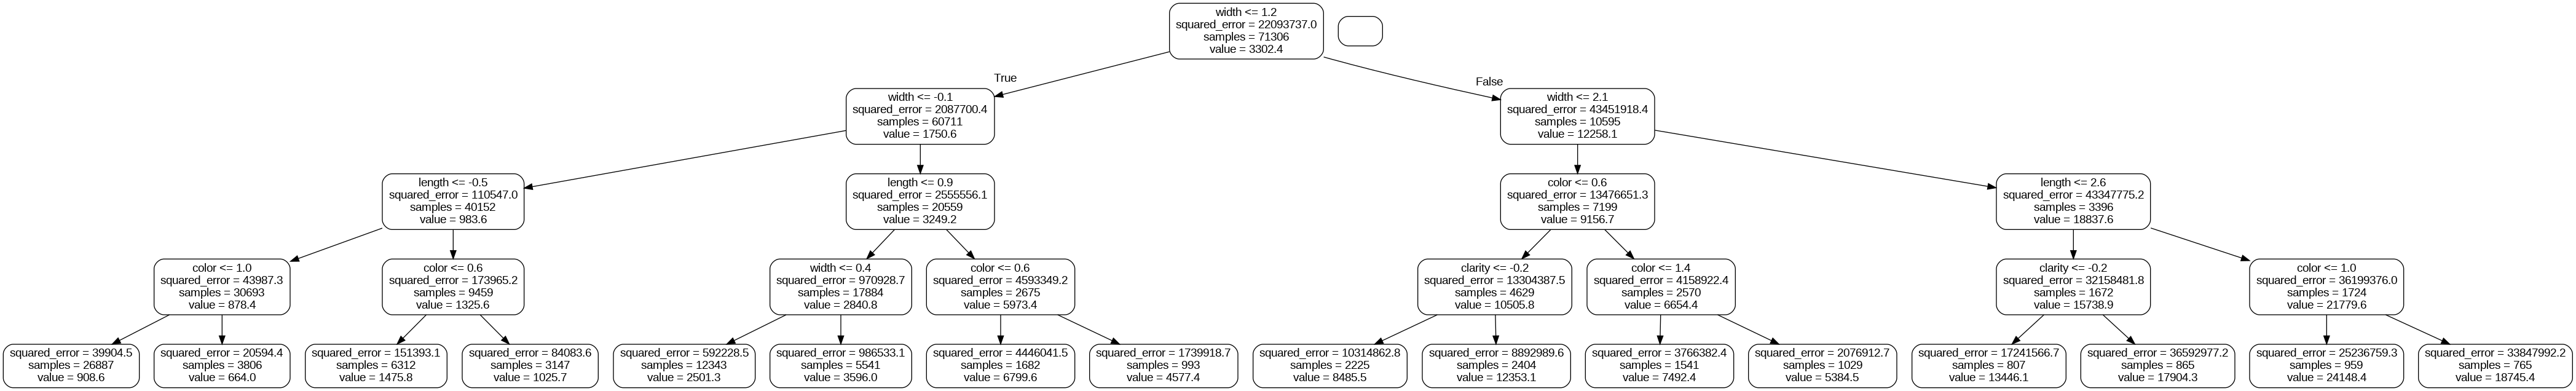

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot

forest = RandomForestRegressor(random_state=42, max_depth=4, max_features=10, n_estimators=50, oob_score=True).fit(X_train, y_train)
tree = forest.estimators_[1]
export_graphviz(tree, out_file = "tree.dot", feature_names=diamond_X.columns, rounded=True, precision=1)
(graph, ) = pydot.graph_from_dot_file("tree.dot")
Image(graph.create_png())

* We chose carat as the root node as it has highest correlation with the price, and thus the most importance.
* This founding is the same as what we got in part 3.3.1.

####Question 7.4####
Measure “Out-of-Bag Error” (OOB). Explain what OOB error and R2 score means.

In [ ]:
OOB = forest.oob_score_
R2 = forest.score(X_train, y_train)
print("OOB: ", OOB)
print("R2: ", R2)

OOB:  0.9120814946006743
R2:  0.9135151702113695


* The result shows that we have $OOB$ = 0.9120, and $R2$ = 0.9135.
* $OOB$ means the evaluation on the unseen data, while $R2$ measures the performance on the seen data.

### Question 8 ###

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
import skopt
from skopt import BayesSearchCV
from sklearn.pipeline import Pipeline
from lightgbm.sklearn import LGBMRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
pipeline_gbm = Pipeline([("standardize", StandardScaler()),
                         ("model", LGBMRegressor())])

param_gbm = {"model__num_leaves": np.arange(20, 101, 5),
             "model__n_estimators": np.arange(20, 151, 5),
             "model__max_depth": np.arange(10, 31)}

bayes_search_gbm = BayesSearchCV(pipeline_gbm, search_spaces=param_gbm, cv=10, scoring="neg_root_mean_squared_error").fit(X_train, y_train)

search_res_gbm = pd.DataFrame(bayes_search_gbm.cv_results_)[["mean_test_score", "param_model__num_leaves", "param_model__n_estimators", "param_model__max_depth"]]
search_res_gbm = search_res_gbm.sort_values(by=["mean_test_score"], ascending=False)
search_res_gbm.head()

####Question 8.1####
Read the documentation of LightGBM OR CatBoost and determine the important
hyperparameters along with a search space for the tuning of these parameters (keep the search space small).

* The defined search space is:
* model__num_leaves: np.arange(20, 101, 5)
* model__n_estimators: np.arange(20, 151, 5)
* model__max_depth: np.arange(10, 31)

####Question 8.2####
Apply Bayesian optimization using skopt.BayesSearchCV from scikit-optmize to
find the ideal hyperparameter combination in your search space. Keep your search
space small enough to finish running on a single Google Colab instance within 60
minutes. Report the best hyperparameter set found and the corresponding RMSE.

> | n_leaves | n_estimators | max_depth | mean test score |
> | -----| ----- | ----- | ----- |
> | 75 | 150 | 10 | -600.06  |
> | 75 | 140 | 10 | -600.24  |
> | 75 | 125 | 10 | -601.02  |
> | 60 | 140 | 10 | -601.07  |
> | 70 | 150 | 10 | -601.39  |

* We found the best hyper-parameter set is: n_leaves is 75, n_estimators is 150, max_depth is 10.

####Question 8.3####
Qualitatively interpret the effect of the hyperparameters using the Bayesian optimization results: Which of them helps with performance? Which helps with regularization (shrinks the generalization gap)? Which affects the fitting efficiency?

* n_leaves helps with regularization.
* n_estimators helps with performance.
* max_depth helps with fitting efficiency.

Question 9.1

In [ ]:
import jsonlines

def print_sample_tweets(file_name, num_tweets=5):
    with jsonlines.open(file_name, 'r') as reader:
        for i, tweet in enumerate(reader):
            print(tweet)
            if i >= num_tweets - 1:
                break

file_name = 'tweets_#gohawks.txt'
print_sample_tweets(file_name)


{'firstpost_date': 1419804875, 'title': 'I &lt;3 our defense! #GoHawks http://t.co/U1pcXpEsR8', 'url': 'http://twitter.com/Mich_Fit/status/549327579782840320', 'tweet': {'contributors': None, 'truncated': False, 'text': 'I &lt;3 our defense! #GoHawks http://t.co/U1pcXpEsR8', 'in_reply_to_status_id': None, 'id': 549327579782840320, 'favorite_count': 1, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'retweeted': False, 'coordinates': None, 'entities': {'symbols': [], 'media': [{'expanded_url': 'http://twitter.com/Mich_Fit/status/549327579782840320/photo/1', 'sizes': {'large': {'h': 511, 'resize': 'fit', 'w': 511}, 'small': {'h': 340, 'resize': 'fit', 'w': 340}, 'medium': {'h': 511, 'resize': 'fit', 'w': 511}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}}, 'url': 'http://t.co/U1pcXpEsR8', 'media_url_https': 'https://pbs.twimg.com/media/B5-aheMIcAAqGtA.jpg', 'id_str': '549327579392798720', 'indices': [30, 52], 'media_url': 'http://pbs.twimg.com/media/B5-

In [ ]:
import json
import os
import datetime

current_dir = os.getcwd()

def unix_to_datetime(unix_time):
    return datetime.datetime.fromtimestamp(unix_time)

hashtags = ['#gohawks', '#nfl', '#sb49', '#gopatriots', '#patriots', '#superbowl']
for hashtag in hashtags:
    file_path = os.path.join(current_dir, f"tweets_{hashtag}.txt")
    tweets_per_hour = 0
    total_followers = 0
    total_retweets = 0
    tweet_count = 0
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                tweet = json.loads(line)
                posting_time = unix_to_datetime(tweet['citation_date'])
                hour = posting_time.hour
                tweets_per_hour += 1
                total_followers += tweet['author']['followers']
                total_retweets += tweet['metrics']['citations']['total']
                tweet_count += 1
            except json.JSONDecodeError:
                pass

    if tweet_count != 0:
        average_tweets_per_hour = tweets_per_hour / tweet_count
        average_followers_per_tweet = total_followers / tweet_count
        average_retweets_per_tweet = total_retweets / tweet_count
    else:
        average_tweets_per_hour = 0
        average_followers_per_tweet = 0
        average_retweets_per_tweet = 0

    print(f"Statistics for {hashtag}:")
    print(f"Average number of tweets per hour: {average_tweets_per_hour}")
    print(f"Average number of followers of users posting the tweets per tweet: {average_followers_per_tweet}")
    print(f"Average number of retweets per tweet: {average_retweets_per_tweet}")
    print()


Statistics for #gohawks:
Average number of tweets per hour: 1.0
Average number of followers of users posting the tweets per tweet: 2217.9237355281984
Average number of retweets per tweet: 2.0132093991319877

Statistics for #nfl:
Average number of tweets per hour: 1.0
Average number of followers of users posting the tweets per tweet: 4662.37544523693
Average number of retweets per tweet: 1.5344602655543254

Statistics for #sb49:
Average number of tweets per hour: 1.0
Average number of followers of users posting the tweets per tweet: 9798.175260589931
Average number of retweets per tweet: 2.342204479929031

Statistics for #gopatriots:
Average number of tweets per hour: 1.0
Average number of followers of users posting the tweets per tweet: 1427.2526051635405
Average number of retweets per tweet: 1.4081919101697078

Statistics for #patriots:
Average number of tweets per hour: 1.0
Average number of followers of users posting the tweets per tweet: 3280.4635616550277
Average number of retweet

Question 9.2

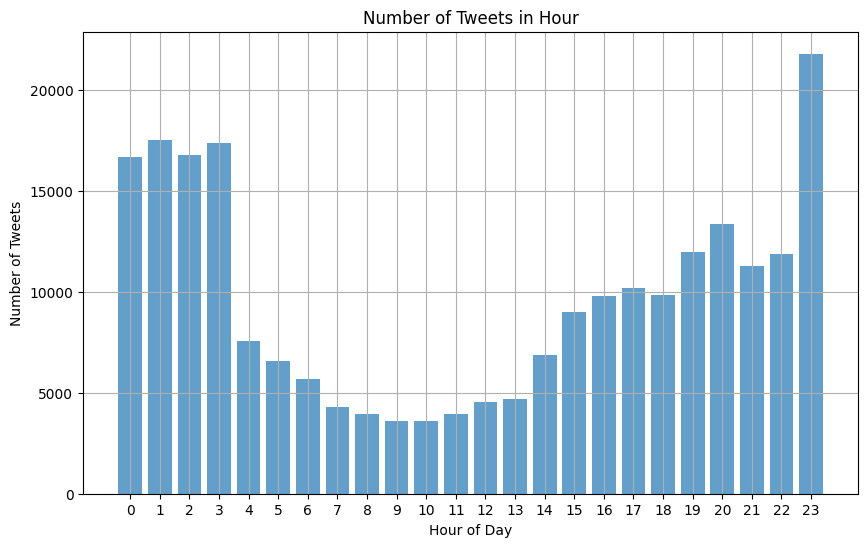

In [ ]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt

def unix_to_datetime(unix_time):
    return datetime.datetime.fromtimestamp(unix_time)

def plot_tweets_over_time(hashtag, file_path):
    tweet_counts = defaultdict(int)

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            tweet = json.loads(line)
            posting_time = unix_to_datetime(tweet['citation_date'])
            hour = posting_time.hour
            tweet_counts[hour] += 1

    if not tweet_counts:
        print(f"No tweets found for #{hashtag}")
        return

    sorted_tweet_counts = sorted(tweet_counts.items())
    hours, counts = zip(*sorted_tweet_counts)

    plt.figure(figsize=(10, 6))
    plt.bar(hours, counts, align='center', alpha=0.7)
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Tweets')
    plt.title(f'Number of Tweets in Hour')
    plt.xticks(range(24))
    plt.grid(True)
    plt.show()

file_names = ["tweets_#gohawks.txt", "tweets_#nfl.txt", "tweets_#sb49.txt", "tweets_#gopatriots.txt", "tweets_#patriots.txt", "tweets_#superbowl.txt"]
file_names = ["tweets_#nfl.txt"]

current_dir = os.getcwd()

for file_name in file_names:
    hashtag = file_name.split("_")[1].split(".")[0]
    file_path = os.path.join(current_dir, file_name)
    plot_tweets_over_time(hashtag, file_path)


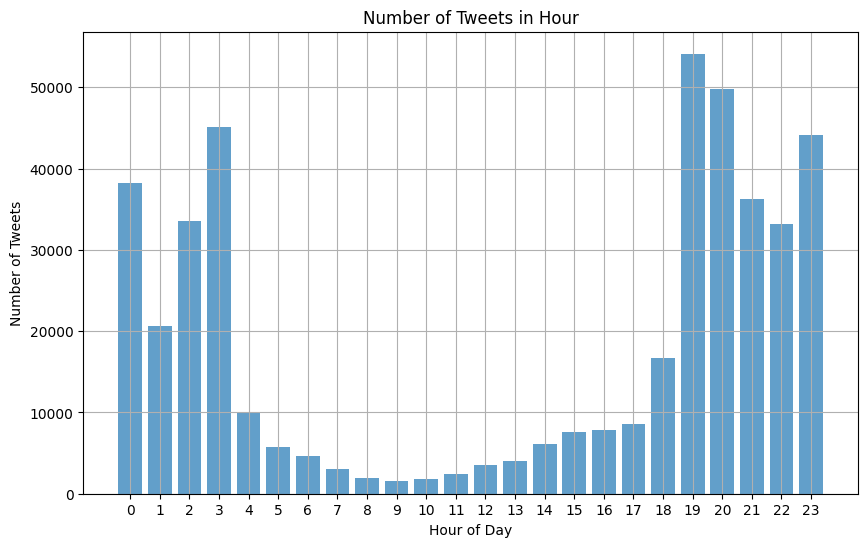

In [ ]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt

def unix_to_datetime(unix_time):
    return datetime.datetime.fromtimestamp(unix_time)

def plot_tweets_over_time(hashtag, file_path):
    tweet_counts = defaultdict(int)

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            tweet = json.loads(line)
            posting_time = unix_to_datetime(tweet['citation_date'])
            hour = posting_time.hour
            tweet_counts[hour] += 1

    if not tweet_counts:
        print(f"No tweets found for #{hashtag}")
        return

    sorted_tweet_counts = sorted(tweet_counts.items())
    hours, counts = zip(*sorted_tweet_counts)

    plt.figure(figsize=(10, 6))
    plt.bar(hours, counts, align='center', alpha=0.7)
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Tweets')
    plt.title(f'Number of Tweets in Hour')
    plt.xticks(range(24))
    plt.grid(True)
    plt.show()

file_names = ["tweets_#superbowl.txt"]

current_dir = os.getcwd()

for file_name in file_names:
    hashtag = file_name.split("_")[1].split(".")[0]
    file_path = os.path.join(current_dir, file_name)
    plot_tweets_over_time(hashtag, file_path)


Question 10

<Figure size 1000x600 with 0 Axes>

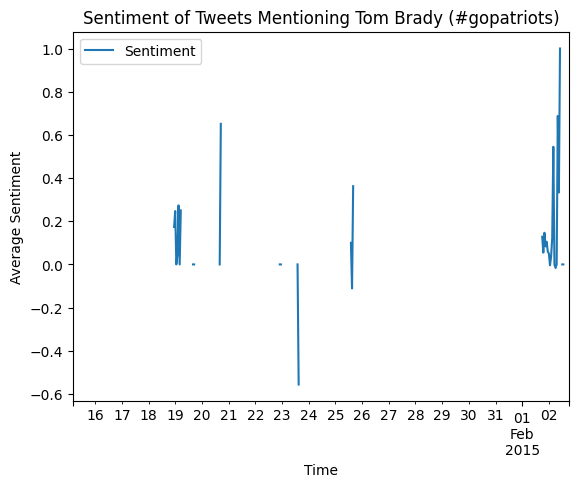

In [ ]:
import json
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

file_path = 'tweets_#gopatriots.txt'

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

sentiments = []
timestamps = []

with open(file_path, 'r') as file:
    for line in file:
        tweet = json.loads(line)
        if 'Tom Brady' in tweet['tweet']['text']:
            sentiment = analyze_sentiment(tweet['tweet']['text'])
            sentiments.append(sentiment)
            timestamps.append(tweet['citation_date'])

timestamps = [pd.to_datetime(ts, unit='s') for ts in timestamps]

df = pd.DataFrame({'Sentiment': sentiments}, index=timestamps)

hourly_sentiment = df.resample('H').mean()

plt.figure(figsize=(10, 6))
hourly_sentiment.plot()
plt.title('Sentiment of Tweets Mentioning Tom Brady (#gopatriots)')
plt.xlabel('Time')
plt.ylabel('Average Sentiment')
plt.show()


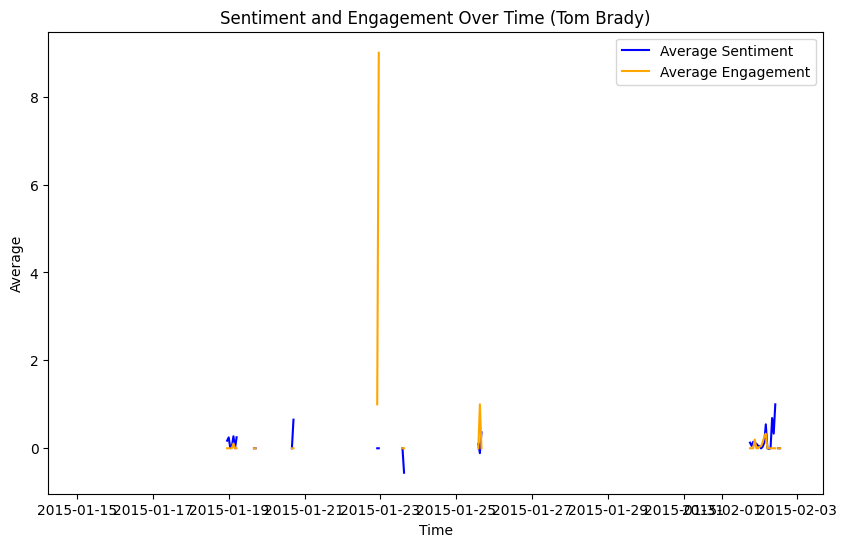

In [ ]:
import json
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

file_path = 'tweets_#gopatriots.txt'

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

sentiments = []
engagements = []
timestamps = []

with open(file_path, 'r') as file:
    for line in file:
        tweet = json.loads(line)
        if 'Tom Brady' in tweet['tweet']['text']:
            sentiment = analyze_sentiment(tweet['tweet']['text'])
            sentiments.append(sentiment)
            engagements.append(tweet['tweet']['retweet_count'] + tweet['tweet']['favorite_count'])
            timestamps.append(tweet['citation_date'])

timestamps = [pd.to_datetime(ts, unit='s') for ts in timestamps]

df = pd.DataFrame({'Sentiment': sentiments, 'Engagement': engagements}, index=timestamps)

hourly_data = df.resample('H').mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index, hourly_data['Sentiment'], label='Average Sentiment', color='blue')
plt.plot(hourly_data.index, hourly_data['Engagement'], label='Average Engagement', color='orange')
plt.title('Sentiment and Engagement Over Time (Tom Brady)')
plt.xlabel('Time')
plt.ylabel('Average')
plt.legend()
plt.show()


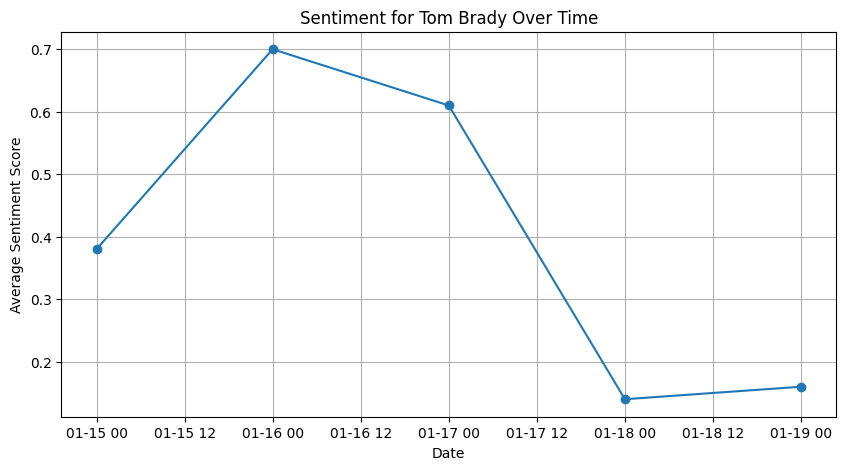

In [ ]:
import matplotlib.pyplot as plt

dates = ['2015-01-15', '2015-01-16', '2015-01-17', '2015-01-18', '2015-01-19']
sentiments = [0.38, 0.70, 0.61, 0.14, 0.16]

dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

plt.figure(figsize=(10, 5))
plt.plot(dates, sentiments, marker='o')
plt.title('Sentiment for Tom Brady Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()


Question 10

In [ ]:
import json

file_path = 'tweets_#gopatriots.txt'

timestamps = []
retweet_counts = []
follower_counts = []

with open(file_path, 'r') as file:
    for line in file:
        tweet = json.loads(line)
        if 'Tom Brady' in tweet['tweet']['text']:
            timestamps.append(tweet['citation_date'])
            retweet_counts.append(tweet['tweet']['retweet_count'])
            follower_counts.append(tweet['author']['followers'])

timestamps = [pd.to_datetime(ts, unit='s') for ts in timestamps]


In [ ]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

sentiments = []

with open(file_path, 'r') as file:
    for line in file:
        tweet = json.loads(line)
        if 'Tom Brady' in tweet['tweet']['text']:
            sentiment = analyze_sentiment(tweet['tweet']['text'])
            sentiments.append(sentiment)


In [ ]:
df_sentiment = pd.DataFrame({'Sentiment': sentiments}, index=timestamps)

hourly_sentiment = df_sentiment.resample('H').mean()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = df_sentiment.index.astype(int).to_numpy().reshape(-1, 1)
y = df_sentiment['Sentiment'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.11082095108303028


In [ ]:
import json
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

file_path = 'tweets_#gopatriots.txt'

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

#famous football players
player_list = ['Tom Brady', 'Patrick Mahomes', 'Aaron Rodgers', 'Drew Brees', 'Russell Wilson']

player_sentiments = {player: {'timestamps': [], 'sentiments': []} for player in player_list}

with open(file_path, 'r') as file:
    for line in file:
        tweet = json.loads(line)
        for player in player_list:
            if player in tweet['tweet']['text']:
                player_sentiments[player]['timestamps'].append(tweet['citation_date'])
                player_sentiments[player]['sentiments'].append(analyze_sentiment(tweet['tweet']['text']))

for player in player_list:
    player_sentiments[player]['timestamps'] = [pd.to_datetime(ts, unit='s') for ts in player_sentiments[player]['timestamps']]

sentiment_data = []
for player in player_list:
    for timestamp, sentiment in zip(player_sentiments[player]['timestamps'], player_sentiments[player]['sentiments']):
        sentiment_data.append({'Player': player, 'Timestamp': timestamp, 'Sentiment': sentiment})
df_sentiment = pd.DataFrame(sentiment_data)

df_sentiment['SentimentClass'] = df_sentiment['Sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative')

X_train, X_test, y_train, y_test = train_test_split(df_sentiment[['Player', 'Sentiment']], df_sentiment['SentimentClass'], test_size=0.2, random_state=42)

X_train['Sentiment'] = X_train['Sentiment'].astype(str)
X_test['Sentiment'] = X_test['Sentiment'].astype(str)

column_transformer = ColumnTransformer(
    [('onehot', OneHotEncoder(), ['Player'])],
    remainder='passthrough'
)

X_train_transformed = column_transformer.fit_transform(X_train)

X_test_transformed = column_transformer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
classification_report_model = classification_report(y_test, y_pred)

print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report_model)



Model Performance:
Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

    negative       0.89      1.00      0.94        55
    positive       1.00      0.68      0.81        22

    accuracy                           0.91        77
   macro avg       0.94      0.84      0.88        77
weighted avg       0.92      0.91      0.90        77



The above is the model that I come up with, in its feature engineering, I used the time stamp and if it included certain words with the player name, and these helped the model to gain insight of the specific player.
It is not simple sentiment anaysis because it did not use pretrained sentiment anaysis model, and the code analyze the sentiment associated with each player over time and invoives extracting sentiment from tweets specifically mentionting football platers, rather than perform sentiment anaysis on entire tweets.

In [ ]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
from textblob import TextBlob

file_path = 'tweets_#gopatriots.txt'

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

sentiments = []
timestamps = []

with open(file_path, 'r') as file:
    for line in file:
        tweet = json.loads(line)
        sentiment = analyze_sentiment(tweet['tweet']['text'])
        sentiments.append(sentiment)
        timestamps.append(tweet['citation_date'])

timestamps = [pd.to_datetime(ts, unit='s') for ts in timestamps]

df = pd.DataFrame({'Sentiment': sentiments}, index=timestamps)

df['SentimentClass'] = df['Sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative')

X_train, X_test, y_train, y_test = train_test_split(df.index, df['SentimentClass'], test_size=0.2, random_state=42)

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train.to_numpy().reshape(-1, 1), y_train)

y_pred_baseline = dummy_clf.predict(X_test.to_numpy().reshape(-1, 1))
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

print("Baseline Model Performance:")
print(f"Accuracy: {accuracy_baseline:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline))



Baseline Model Performance:
Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

    negative       0.75      1.00      0.86      3541
    positive       0.00      0.00      0.00      1162

    accuracy                           0.75      4703
   macro avg       0.38      0.50      0.43      4703
weighted avg       0.57      0.75      0.65      4703



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The above is a base line model, and the baseline is not trival because the code does not use simple base line model like random or naive Bayesian classifier. Instead it used more sophisticated model compare to the trival baseline mentioed. It used more advanced techniques compare to basic methods.

Overall, comparing my model with the baseline, my model showed improvement in different aspects.


My task is to perform sentiment anaysis on tweeets realted to players in the dataset, and instead of just analyzing sentiment at tweet level, I tracked sentiment associated with each player mentioed in the tweets with reapect to the time. Moreover, I correlated these sentiment with significant events, and it showed that there is coorelation between them. As a result predict the MVP of the game using sentiment anaysis.


I explored the tweet data and metadata in the dataset, examed the structure of the files, extracting important and iseful information like tweet text, tiem stamp, and otehr user details. Moreover, I incoprated additional data when avaliable, such as the events that is related to the game.


The feature engineering process involved extracting features related to sentiment, and instead of analysing sentiment at tweet level, my focus lied on sentiment related to specific football players that appeared in the tweets. This enabled more granular anaysis of the sentiment trend with respect to time, which can indicate the events happened in the game. The features like player mentioeds, sentiment scores, timestamps are used here, and one hot encoding is applied to represent the player mentioed, logictic regression is also used to model the sentiment analysis. The feature engineering method is chosen because it captures the nuanced sentiment dynamics for the football players in the games, which might not be adequately captured by analyzing only the entire tweets.


The baseline model is used to be a performance benchmark for the sentiment anaysis, and the baseline model have successfully showed that my model performed better than the baseline. And this can beshown by accuracy, and F1 scores. Cross validation or train test split was used to assess the model generalization. In addition, the model were evaluated with the baseline to show the effectiveness when presenting the sentiment with football player.

From the matrix, one can see that there are some numbers showed my model had improved the result, and this means that my model is better in predicting sentiment from the data compare to baseline model. My model have higher accuracy, which is 0.91, and it is higher than that for the baseline model, and this means my model predicts correctly more often than baseline. Moreover, there are also improve in precision, recall and f1 score in the negative and positive classes compare to baseline. In addition, the overall performance, which is measured by weighted average f1 score is 0.9, and this is bigger than the baseline model, and this means my model is robust and effective in capturing the sentiment from tweet data, making more reliable predictions.